<a id="top"></a>
# Internship project: Transforming raw rainfall data into a high quality data product  

### Team 3: Explore DS Academy
---
<img src="https://www.esri.com/content/dam/esrisites/en-us/about/what-is-gis/assets/image-switcher-maps/identify-problems-what-is-gis-image-switcher.jpg" align="left">

**Team Members:** Okon Prince, Elvis Esharegharan, Abiemwense Omokaro, Elmund Dotsey, Joseph Okonkwo, Alfred Mondi  
**Internship Mentors:** Muzi Xaba, Kelly Ile

* [Notebook repo](https://github.com/Muzi-EXPLORE/intern_team_3_2022_rainfall_data)
* [Trello board](https://trello.com/b/UtTFA0JS/team-3) 

In [66]:
import geopandas as gpd
import shapely.wkt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

In [67]:
# load the data. (o=optimised, no= non-optimised)
df_o= pd.read_csv('Optimised_rainfall_objects_202209.csv') 
df_no= pd.read_csv('Non-optimised_rainfall_objects_202209.csv') 

In [68]:
#Print the 1st 5 rows of the optimised df
df_o.head()

,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,STATION_AREA_WKT,CREATIONTIME
0,CM53010213-cbd2-4f6d-b3ca-48380c1a9182,50.890245,0.557153,Catchment,CM,"POLYGON ((0.555378 50.88834,0.555892 50.889354...",2022-03-23 18:02:52.000
1,CM145cd21b-3329-4d9f-b44c-14da1a9824a2,51.146506,-0.004037,Catchment,CM,"POLYGON ((-0.010209 51.147913,-0.003574 51.147...",2022-03-23 18:02:52.000
2,CM1f9fd786-9dcd-4a88-9fd7-14ebf61ad0b2,50.794966,-1.023181,Catchment,CM,"POLYGON ((-1.016756 50.792095,-1.017329 50.792...",2022-03-23 18:02:53.000
3,CMae692cd6-fefe-4e1b-8777-25a90d8017fa,51.112963,0.183215,Catchment,CM,"POLYGON ((0.186719 51.11561,0.18656 51.115525,...",2022-03-23 18:02:54.000
4,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,51.336560,1.369312,Catchment,CM,"POLYGON ((1.381381 51.333004,1.38128 51.333037...",2022-03-23 18:02:54.000


In [69]:
#Print the 1st 5 rows of the non-optimised df
df_no.head()

,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,STATION_AREA_WKT,CREATIONTIME
0,HSadee6548-d797-49a3-a2a0-b7e8348f0b27,51.130919,1.317469,Hotspot,HS,NaN,2019-05-23 10:22:57.000
1,HSfd30138a-5a83-450a-81d3-7d1335d69c09,50.846194,-1.055814,Hotspot,HS,NaN,2019-05-20 11:42:16.000
2,HSefb5e85c-71f8-42a4-b529-44cdd306486d,50.839552,-1.044914,Hotspot,HS,NaN,2019-05-20 12:12:35.000
3,HS9037443f-c430-4468-86b8-8c2c0362e1c6,51.416060,0.752698,Hotspot,HS,NaN,2019-05-23 14:28:36.000
4,HS27e9d11e-c6ce-4e8f-ba3a-aac71fd09ff3,50.824115,-0.426342,Hotspot,HS,NaN,2018-04-10 12:31:01.000


In [70]:
# Check the shape of both dfs
df_o.shape, df_no.shape

((90, 7), (597, 7))

In [71]:
# Check detailed info about the dfs
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATION_NO             90 non-null     object 
 1   STATION_LATITUDE       90 non-null     float64
 2   STATION_LONGITUDE      90 non-null     float64
 3   OBJECT_TYPE            90 non-null     object 
 4   OBJECT_TYPE_SHORTNAME  90 non-null     object 
 5   STATION_AREA_WKT       90 non-null     object 
 6   CREATIONTIME           90 non-null     object 
dtypes: float64(2), object(5)
memory usage: 5.0+ KB


In [72]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATION_NO             597 non-null    object 
 1   STATION_LATITUDE       597 non-null    float64
 2   STATION_LONGITUDE      597 non-null    float64
 3   OBJECT_TYPE            597 non-null    object 
 4   OBJECT_TYPE_SHORTNAME  597 non-null    object 
 5   STATION_AREA_WKT       56 non-null     object 
 6   CREATIONTIME           597 non-null    object 
dtypes: float64(2), object(5)
memory usage: 32.8+ KB


Notice that the optimised data frame has no null values while the non-optimised data frame has 541 null values in the "STATION_AREA_WKT" column. Both data sets have the exact same number of columns and the column names are also identical. Further exploration of the data frame should reveal the actual objects that are nulls.

In [73]:
# Check the unique classes or values in the OBJECT TYPE feature
df_no['OBJECT_TYPE'].value_counts()

Hotspot             541
Catchment            49
Zone of interest      7
Name: OBJECT_TYPE, dtype: int64

### Task 1
Use only "hotspots" (indicated in OBJECT_TYPE column) from the Non-optimised_rainfall_objects_202209.csv 

To do this, we need to filter our df_no data frame for  OBJECT_TYPE "Hotspot" alone.

In [74]:
# Create a new df (df_nohotspot) and populate it with only the rows with a hotspot entry
df_hotspot = df_no[df_no['OBJECT_TYPE']!='Hotspot']

# Check the shape of your new data frame
df_hotspot.shape

(56, 7)

In [75]:
# Print out df_nohotspot head to see the get a feel of what your df is like
df_hotspot.head()

,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,STATION_AREA_WKT,CREATIONTIME
13,CM145fbbb3-814c-46c8-b365-545185983755,51.108822,0.951913,Catchment,CM,"POLYGON ((0.82771 51.07838,0.82291 51.0794,0.8...",2017-03-14 12:19:01.000
14,CM687f7f97-3395-43d9-b0e3-7acb9b3b646c,50.849934,-0.380189,Catchment,CM,"POLYGON ((-0.22827 50.78343,-0.54124 50.78392,...",2017-11-28 15:37:16.000
15,ZIfcbee7eb-6a39-4cf5-9352-6f9c00a50552,50.795757,0.281778,Zone of interest,ZI,"POLYGON ((0.333008 50.788701,0.249299 50.73368...",2019-05-23 10:39:47.000
16,CMeb49aace-8421-4d29-b668-a4d9401d52ec,50.857412,0.273727,Catchment,CM,"POLYGON ((0.46551 50.83185,0.36475 50.82106,0....",2017-11-28 15:37:53.000
17,ZI2088b02a-034b-4b7b-9b9c-efa7470d2c7d,51.214673,0.798888,Zone of interest,ZI,"POLYGON ((0.696387 50.889944,-0.024591 51.2472...",2021-03-12 16:09:44.000


In [76]:
# Create a new dataframe for the all the hotspot objects
#df_hotspot = df_no[df_no['OBJECT_TYPE']=='Hotspot']
#df_hotspot.shape

### Task 2
For the objects in step 1, get the geometry from the column STATION_AREA_WKT. This geometry should only consist of a pair of coordinates. 

In [77]:
df_hotspot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 13 to 596
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATION_NO             56 non-null     object 
 1   STATION_LATITUDE       56 non-null     float64
 2   STATION_LONGITUDE      56 non-null     float64
 3   OBJECT_TYPE            56 non-null     object 
 4   OBJECT_TYPE_SHORTNAME  56 non-null     object 
 5   STATION_AREA_WKT       56 non-null     object 
 6   CREATIONTIME           56 non-null     object 
dtypes: float64(2), object(5)
memory usage: 3.5+ KB


In [79]:
# Define the geometry of the data frame from the "STATION_AREA_WKT" column
geometry = df_hotspot['STATION_AREA_WKT'].map(shapely.wkt.loads)

#Drop the "STATION_AREA_WKT" column
dfg = df_hotspot.drop('STATION_AREA_WKT', axis=1)

#Create a geodataframe from the df_hotspot dataframe
gdf = gpd.GeoDataFrame(df_hotspot, crs="EPSG:4326", geometry=geometry)

In [80]:
df_hotspot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 13 to 596
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   STATION_NO             56 non-null     object  
 1   STATION_LATITUDE       56 non-null     float64 
 2   STATION_LONGITUDE      56 non-null     float64 
 3   OBJECT_TYPE            56 non-null     object  
 4   OBJECT_TYPE_SHORTNAME  56 non-null     object  
 5   STATION_AREA_WKT       56 non-null     object  
 6   CREATIONTIME           56 non-null     object  
 7   geometry               56 non-null     geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 3.9+ KB


<AxesSubplot:>

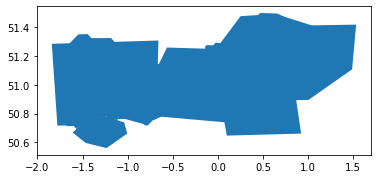

In [81]:
# Print the polygon from this process
gdf.plot()

### Task 3
Get the reference geometry values from the STATION_AREA_WKT in Optimised_rainfall_objects_202209.csv. This geometry will be a polygon and have many points

In [82]:
# Define the geometry of the df_o data frame from the "STATION_AREA_WKT" column
geometry2 = df_o['STATION_AREA_WKT'].map(shapely.wkt.loads)

#Drop the "STATION_AREA_WKT" column
dfg2 = df_o.drop('STATION_AREA_WKT', axis=1)

#Create a geodataframe from the df_o dataframe
gdf2 = gpd.GeoDataFrame(df_o, crs="EPSG:4326", geometry=geometry2)

<AxesSubplot:>

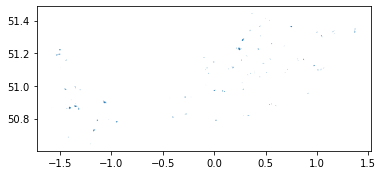

In [83]:
gdf2.plot()

### Task 4
Determine which points from step 2 fall within the polygons from step 3, the geopandas package can be useful here.

In [84]:
# Check the unique classes or values in the OBJECT TYPE feature
#gdf['geometry'].value_counts()

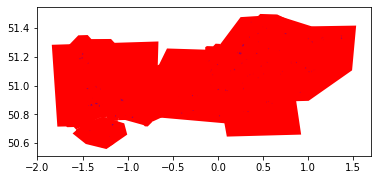

In [85]:
ax = gdf.plot(color='red');
gdf2.plot(ax=ax, color='blue', alpha=0.5);

### Task 5
Send me a list of STATION_NO ids for all the sites identified in step 4.